---
title: Regression
format:
  html:
      embed-resources: true
      code-fold: true
      cite-method: biblatex
---

## Regresssion Trees for Record Data

## Regression Trees for Text Data

100%|██████████| 2434/2434 [00:32<00:00, 74.99it/s] 


Text(0.5, 1.0, 'Yelp Word Cloud')

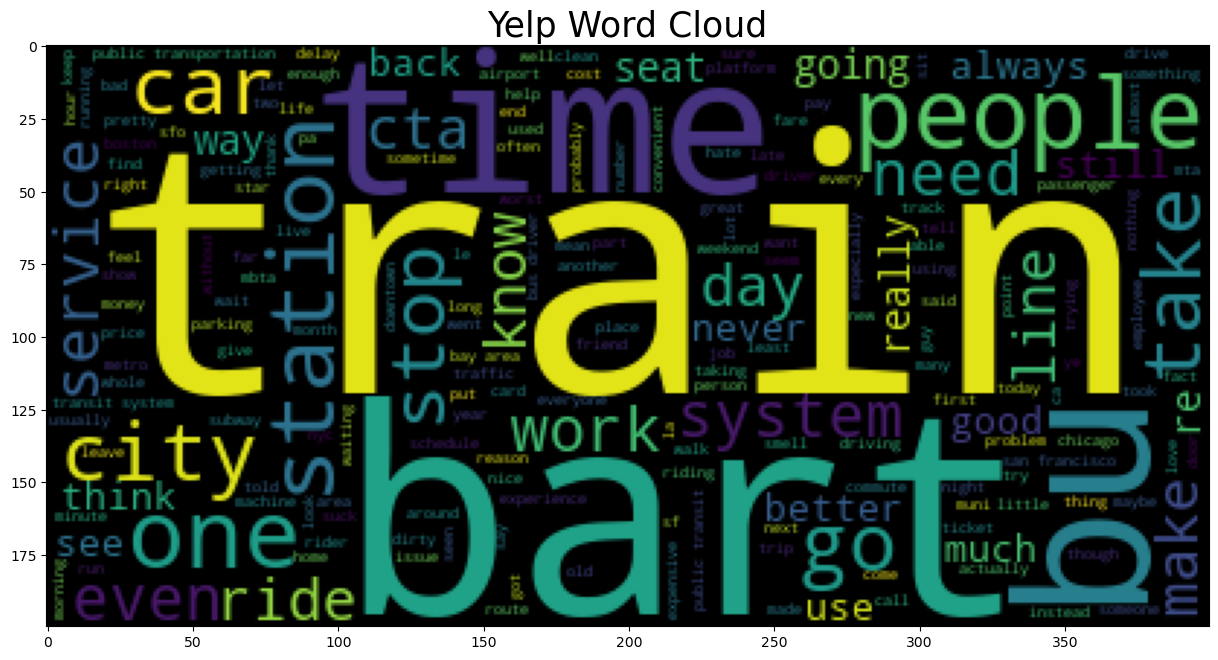

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.metrics import accuracy_score
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from tqdm import tqdm
import string
from collections import Counter
tqdm.pandas()
token_counter = Counter()
yelp=pd.read_csv('../../data/cleaned_data/total_yelp.csv')  
lemmatizer = WordNetLemmatizer()
custom_stoplemmas = [
    'be',
    'ir',
    'll',
    'nt',
    'quot',
    'rd',
    's',
    've'
]

def remove_special_chars(token):
  return token.translate(str.maketrans('', '', string.punctuation))

def remove_digits(token):
  return ''.join([c for c in token if not c.isdigit()])

def clean_review(review_text):
  review_cleaned = review_text.lower()
  review_sents = sent_tokenize(review_cleaned)
  clean_sents = []
  for cur_sent in review_sents:
    sent_tokens = word_tokenize(cur_sent)
    sent_tokens_cleaned = [t for t in sent_tokens if t not in stopwords.words('english')]
    sent_tokens_cleaned = [remove_digits(t) for t in sent_tokens_cleaned]
    sent_tokens_cleaned = [t.replace("-", " ") for t in sent_tokens_cleaned]
    sent_tokens_cleaned = [remove_special_chars(t) for t in sent_tokens_cleaned]
    sent_tokens_cleaned = [t for t in sent_tokens_cleaned if len(t) > 0]
    sent_tokens_cleaned = [lemmatizer.lemmatize(t) for t in sent_tokens_cleaned]
    sent_tokens_cleaned = [t for t in sent_tokens_cleaned if t not in custom_stoplemmas]
    token_counter.update(sent_tokens_cleaned)
    clean_sent = ' '.join(sent_tokens_cleaned)
    clean_sents.append(clean_sent)
  review_final = ". ".join(clean_sents)
  return review_final
yelp['Review_clean'] = yelp['Review'].progress_apply(clean_review)
import wordcloud
import matplotlib.pyplot as plt
wordcloud = wordcloud.WordCloud(min_word_length = 2,max_words = 200).generate(yelp['Review_clean'].str.cat())
fig = plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.title('Yelp Word Cloud',fontsize = 25)


In [ ]:
corpus=yelp["Review"].to_list()
y=yelp["Rating"].to_numpy()
vectorizer=CountVectorizer(min_df=0.001)   

Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())

maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)

from sklearn.model_selection import train_test_split
test_ratio=0.2

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

# HYPER PARAMETER SEARCH FOR OPTIMAL NUMBER OF NEIGHBORS 
num_neighbors_2=[]
train_error=[]
test_error=[]

# LOOP OVER HYPER-PARAM
for i in range(1,31):
    # INITIALIZE MODEL 
    model = KNeighborsRegressor(n_neighbors=i)

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    print("n_neighbors =",i)
    # shift=1+np.min(y_train) #add shift to remove division by zero 
    err1=mean_absolute_error(y_train, yp_train) 
    err2=mean_absolute_error(y_test, yp_test) 

    num_neighbors_2.append(i)
    train_error.append(err1)
    test_error.append(err2)

    print(" train MAE:",err1)
    print(" test MAE:" ,err2)

n_neighbors = 1
 train MAE: 0.0005136106831022085
 test MAE: 1.297741273100616
n_neighbors = 2
 train MAE: 0.6199280945043657
 test MAE: 1.1878850102669405
n_neighbors = 3
 train MAE: 0.7572333504536894
 test MAE: 1.1396303901437372
n_neighbors = 4
 train MAE: 0.8211350796096559
 test MAE: 1.1149897330595482
n_neighbors = 5
 train MAE: 0.8758089368258859
 test MAE: 1.0919917864476387
n_neighbors = 6
 train MAE: 0.9028419791131657
 test MAE: 1.1043805612594115
n_neighbors = 7
 train MAE: 0.9181157825225621
 test MAE: 1.0882956878850103
n_neighbors = 8
 train MAE: 0.9482537236774525
 test MAE: 1.084958932238193
n_neighbors = 9
 train MAE: 0.9515493922273583
 test MAE: 1.0935432352270134
n_neighbors = 10
 train MAE: 0.9617360041088855
 test MAE: 1.1073921971252565
n_neighbors = 11
 train MAE: 0.9817901666900126
 test MAE: 1.0965092402464065
n_neighbors = 12
 train MAE: 0.9929378531073446
 test MAE: 1.1086584531143053
n_neighbors = 13
 train MAE: 0.9975899806408282
 test MAE: 1.11388406254

Text(0, 0.5, 'Training (black) and test (blue) MAE (error)')

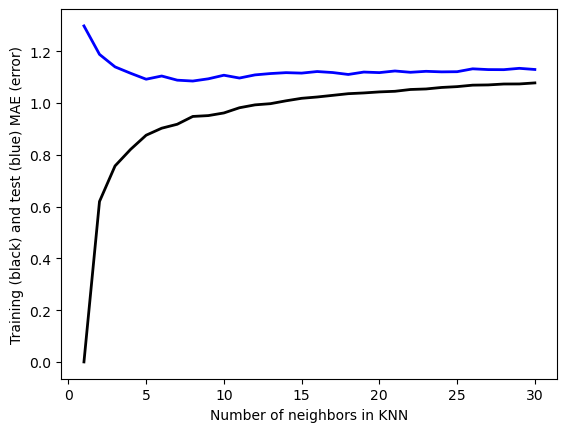

In [36]:
plt.plot(num_neighbors_2,train_error ,linewidth=2, color='k')
plt.plot(num_neighbors_2,test_error ,linewidth=2, color='b')

plt.xlabel("Number of neighbors in KNN")
plt.ylabel("Training (black) and test (blue) MAE (error)")

Text(0, 0.5, 'y_pred (blue=test)(black=Train)')

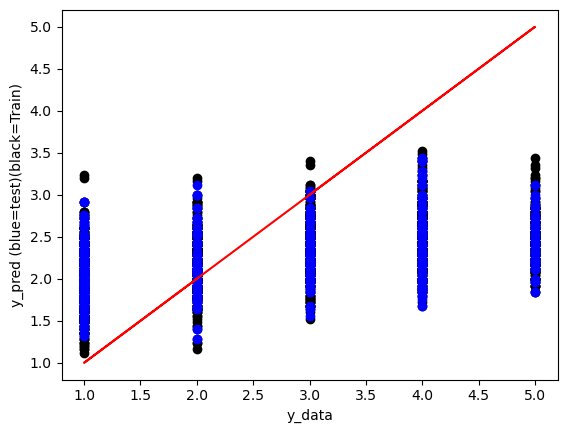

In [38]:
model = KNeighborsRegressor(n_neighbors=25)
model.fit(x_train,y_train)
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)
plt.plot(y_train,yp_train ,"o", color='k')
plt.plot(y_test,yp_test ,"o", color='b')
plt.plot(y_test,y_test ,"-", color='r')

plt.xlabel("y_data")
plt.ylabel("y_pred (blue=test)(black=Train)")